<a href="https://colab.research.google.com/github/marathe90/Hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# Import statements
# Importing matplotlib.pyplot 
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Mount your drive and read the csv file.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hot_file= "/content/drive/MyDrive/Colab Notebooks/Capstone project/P1/Hotel Bookings.csv"
df=pd.read_csv(hot_file)

In [ ]:
#Understanding of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Some of the data is having non-null values. Replacing those values by null values i.e:- by "ZERO"

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In above dataframe we can see the 32 parameter defining the hotel data which are adults, agents, lead time, etc. Few of them also hane Null values. 

In [ ]:
#Analyzing the number of bookings per month for year 2015 & 2017
monthly_booking=df['arrival_date_month'].value_counts()     #Gettingthe value counts
monthly_booking.sort_index(inplace=True)    #sorting the data 
monthly_booking

April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: arrival_date_month, dtype: int64

Text(0.5, 0, 'Month')

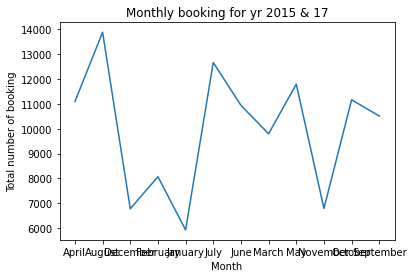

In [ ]:
# Create the plot object
plt.plot(monthly_booking)
plt.title('Monthly booking for yr 2015 & 17')
plt.ylabel('Total number of booking')
plt.xlabel('Month')

1. Hotel is having major booking in the month august considering year 2015 & 2017. which means that august is the busiest month.
2. On the contrary the huge drop in booking can be seen in the month of january.

In [ ]:
# filling all the Null values with non-zero number
df['agent'] = df['agent'].fillna(0)

#bifurcate the data based on the hotel type i.e:- Resort Hotel & city hotel
Resort_Hotel= df[df['hotel'] == 'Resort Hotel']                     # Data for Resort hotel
Resort_Hotel.fillna(0)

city_hotel= df[df['hotel'] == 'City Hotel']                          # Data for City hotel
city_hotel.fillna(0)
city_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79330 entries, 40060 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           79330 non-null  object 
 1   is_canceled                     79330 non-null  int64  
 2   lead_time                       79330 non-null  int64  
 3   arrival_date_year               79330 non-null  int64  
 4   arrival_date_month              79330 non-null  object 
 5   arrival_date_week_number        79330 non-null  int64  
 6   arrival_date_day_of_month       79330 non-null  int64  
 7   stays_in_weekend_nights         79330 non-null  int64  
 8   stays_in_week_nights            79330 non-null  int64  
 9   adults                          79330 non-null  int64  
 10  children                        79326 non-null  float64
 11  babies                          79330 non-null  int64  
 12  meal                       

In [ ]:
#creating the copy of the dataframe to avoid any loss of data from the original dataframe
Resort_Hotel_copy=Resort_Hotel.copy()
city_hotel_copy=city_hotel.copy()

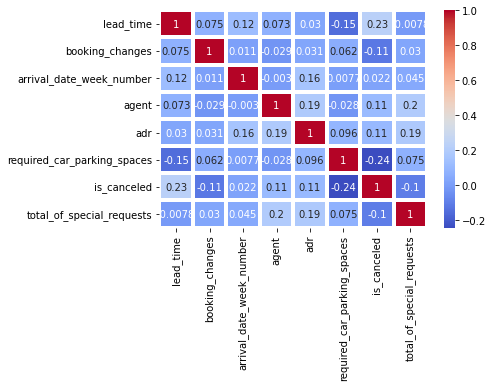

In [ ]:
# heat map fromation
Resort_Hotel_df=Resort_Hotel[['lead_time','booking_changes','arrival_date_week_number','agent','adr', 'required_car_parking_spaces','is_canceled','total_of_special_requests']]
heat_map_r=Resort_Hotel_df.corr() 
sns.heatmap(heat_map_r, annot=True,cmap= 'coolwarm',linecolor= 'white', linewidth=3);

For Resort hotel
1.lead time & cancellation have high corellation, which means that as the waiting time increases the canellation also increases.
2.Special request & adr have slight corellation, which leads to more revenue.
3.Agent dont have much impact as it is finding very slight relation with other parameters.

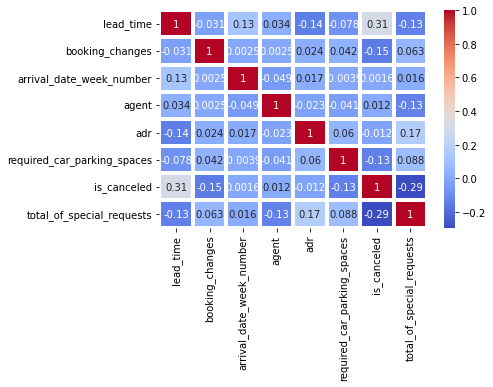

In [ ]:
city_hotel_df=city_hotel[['lead_time','booking_changes','arrival_date_week_number','agent','adr', 'required_car_parking_spaces','is_canceled','total_of_special_requests']]
heat_map_c=city_hotel_df.corr()
sns.heatmap(heat_map_c, annot= True,cmap= 'coolwarm',linecolor= 'white', linewidth=3);

For city hotel
1.lead time & canellation have high corellation, which means that as the waiting time increases the canellation also increases.
2.Special request & adr have slight corellation, which leads to more revenue.
3.Agent dont have much impact as it is finding very slight relation with other parameters.

Text(0.5, 0, 'customer_type')

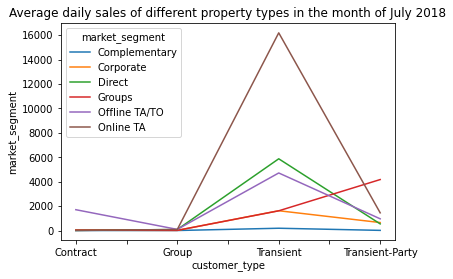

In [ ]:
#Analyzing the data based with repect to market segment & customer type on resort hotel
dist_df=Resort_Hotel.groupby(['customer_type','market_segment'])['customer_type'].count().unstack()   # grouping of data 
dist_df.plot()
plt.title('Average daily sales of different property types in the month of July 2018')
plt.ylabel('market_segment')
plt.xlabel('customer_type')

Text(0.5, 0, 'customer_type')

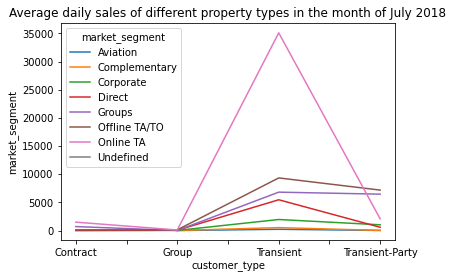

In [ ]:
#Analyzing the data based with repect to market segment & customer type on city hotel
dist_df=city_hotel.groupby(['customer_type','market_segment'])['customer_type'].count().unstack()   # grouping of data 
dist_df.plot()
plt.title('Average daily sales of different property types in the month of July 2018')
plt.ylabel('market_segment')
plt.xlabel('customer_type')

1. Direct comparision can be made between Resort & city hotel, which shows that in both case online transaction is the prefrence for payment. Also while comparing with the type of hotel we observed that city hotel have upper hand on reosrt hotel with repsect to transcation.
2. while other channel such as offline TA/TO has a same impact on both type of hotel.

Text(0.5, 0, 'index')

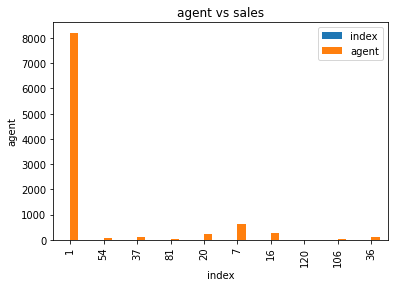

In [ ]:
#High sale for agent(resort hotel)
agent_sales = pd.DataFrame(Resort_Hotel['agent'].value_counts()).reset_index()      #getting the value count for each agent
agent_sales=agent_sales.sort_values('index', ascending = True)                        # sorting the data
agent_sales = agent_sales[:10]
agent_sales.plot(kind='bar')                                      # plotting the bar plot
plt.title('agent vs sales')
plt.ylabel('agent')
plt.xlabel('index')

Text(0.5, 0, 'index')

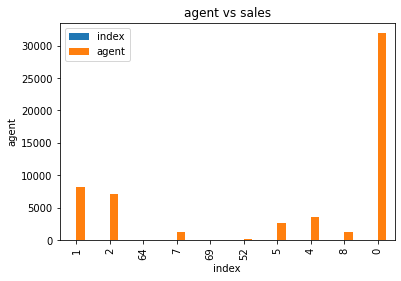

In [ ]:
#High sale for agent(city hotel)
agent_sales = pd.DataFrame(city_hotel['agent'].value_counts()).reset_index()            #getting the value count for each agent
agent_sales=agent_sales.sort_values('index', ascending = True)                          # sorting the data
agent_sales = agent_sales[:10]
agent_sales.plot(kind='bar')                                       # plotting the bar plot
plt.title('agent vs sales')
plt.ylabel('agent')
plt.xlabel('index')

1. For resrot hotel agent having index 1 have the highest booking on contrary for city hotel agent having 0 index have highesh booking.
2. Agents dealing with city hotel have resonable booking as compared to resort hotel agents.

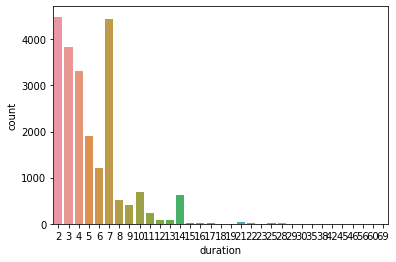

In [ ]:
# adding additoinal column in the frame work for resort hotel
Resort_Hotel_copy
Resort_Hotel_copy.fillna(0)
Resort_Hotel_copy['duration']=Resort_Hotel_copy['stays_in_weekend_nights']+Resort_Hotel_copy['stays_in_week_nights']          #Total stay duration
Resort_Hotel_copy['family_size']= Resort_Hotel_copy['adults']+Resort_Hotel_copy['children']+Resort_Hotel_copy['babies']       #size of the family

#plotting count plot for duration of stay
zero_cancel= Resort_Hotel_copy[Resort_Hotel_copy['is_canceled'] == 0]
greater_stay= zero_cancel[zero_cancel['duration'] >1]
sns.countplot(x=greater_stay['duration'])
plt.show()

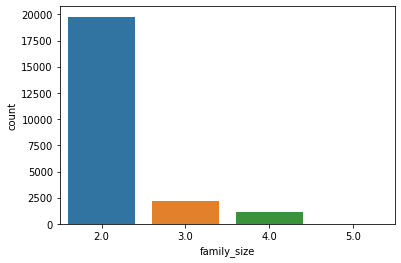

In [ ]:
#plotting count plot for family size
zero_cancel= Resort_Hotel_copy[Resort_Hotel_copy['is_canceled'] == 0]
greater_stay= zero_cancel[zero_cancel['family_size'] >1]
sns.countplot(x=greater_stay['family_size'])
plt.show()

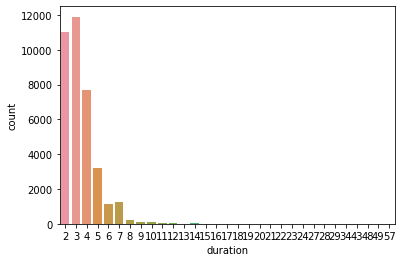

In [ ]:
# adding additoinal column in the frame work for city hotel
city_hotel_copy
city_hotel_copy.fillna(0)
city_hotel_copy['duration']=city_hotel_copy['stays_in_weekend_nights']+city_hotel_copy['stays_in_week_nights']            #Total stay duration
city_hotel_copy['family_size']= city_hotel_copy['adults']+city_hotel_copy['children']+city_hotel_copy['babies']            #size of the family

#plotting count plot for duration of stay
zero_cancel= city_hotel_copy[city_hotel_copy['is_canceled'] == 0]
greater_stay= zero_cancel[zero_cancel['duration'] >1]
sns.countplot(x=greater_stay['duration'])
plt.show()

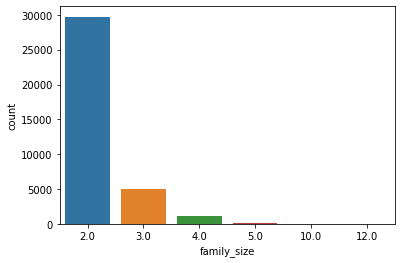

In [ ]:
#plotting count plot for family size
zero_cancel= city_hotel_copy[city_hotel_copy['is_canceled'] == 0]
greater_stay= zero_cancel[zero_cancel['family_size'] >1]
sns.countplot(x=greater_stay['family_size'])
plt.show()

1. Generally the couple likes to book city hotel for longer duration
2. Few couple likes to bring there children for the vacation
3. Couple likes to spend more time in resort hotel as compare to city hotel

Text(0.5, 0, 'type')

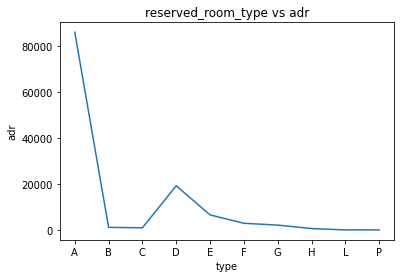

In [ ]:
# Analyzing the data for the room preference & adr
room_type=df['reserved_room_type'].value_counts()     #Gettingthe value counts
room_type.sort_index(inplace=True)                     #sorting the data 

# Create the plot object
plt.plot(room_type)
plt.title('reserved_room_type vs adr')
plt.ylabel('adr')
plt.xlabel('type')

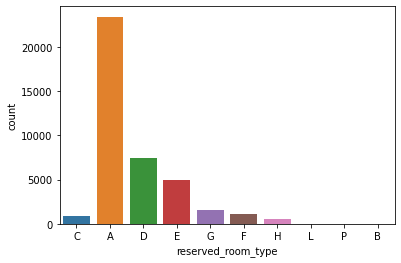

In [ ]:
#Room preference count plot

sns.countplot(x=Resort_Hotel_copy['reserved_room_type'])

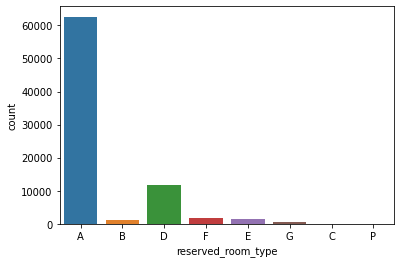

In [ ]:
#Room preference count plot
sns.countplot(x=city_hotel_copy['reserved_room_type'])

1.Majorly Room type 'A' is majorly booked by the customer
2. As the room type 'A' is having high demand it is but obvious that it will be having highest adr.
3. Room type 'C', 'D' & 'E' have resonable adr

Which type of meal is generally preferd by the customer?

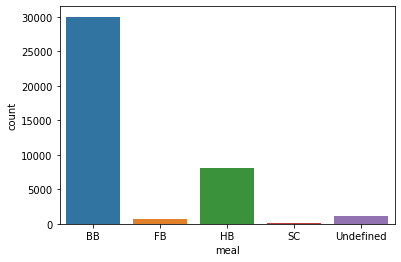

In [ ]:
sns.countplot(x=Resort_Hotel_copy['meal'])

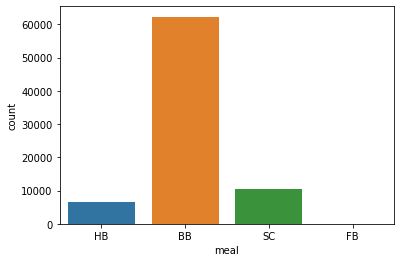

In [ ]:
sns.countplot(x=city_hotel_copy['meal'])

In both cases BB type of meal is prefred.

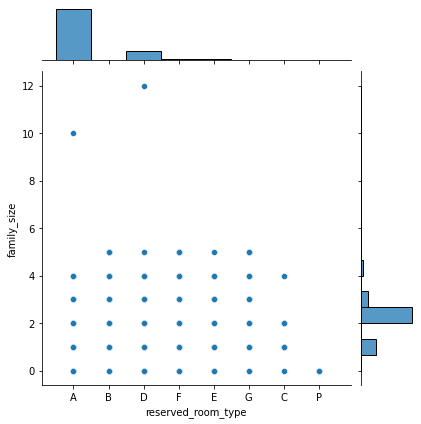

In [ ]:
# Identifying the prefrence of family for room in Resort hotel
sns.jointplot(x='reserved_room_type', y='family_size', data=city_hotel_copy)

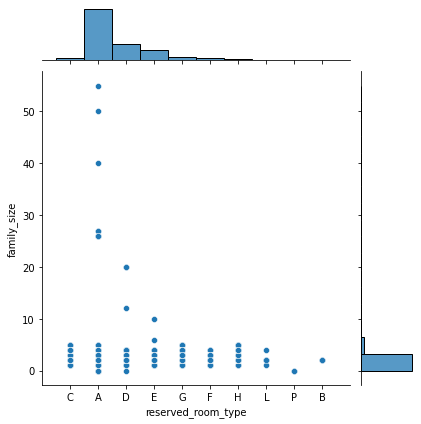

In [ ]:
# Identifying the prefrence of family for room in city hotel
sns.jointplot(x='reserved_room_type', y='family_size', data=Resort_Hotel_copy)

1. In resort hotel the size of the family doesnt have much impact on the room selection
2. For city hotel the more prefrence is given to room type 'A'